In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
from obs_read import read_aws_half_hourly

def get_corr_str(x, y):
    return str(round(spearmanr(x, y).correlation, 3))

In [2]:
#Load data
stn_map = {14015:"Darwin",66037:"Sydney",16001:"Woomera",23034:"Adelaide"}
obs = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/UA_wrfpython.pkl")
obs["stn_name"] = obs["stn_id"].map(stn_map)
barpa = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/barpa_erai_2005_2015.pkl").rename(columns={"loc_id":"stn_name"})
barpa = barpa[np.in1d(barpa.stn_name,["Adelaide","Darwin","Sydney","Woomera"])]
erai = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/points/erai_2005_2015.pkl").rename(columns={"loc_id":"stn_name"})
erai = erai[np.in1d(erai.stn_name,["Adelaide","Darwin","Sydney","Woomera"])]

In [11]:
#Combine CAPE for obs, BARPA and ERAI, for times which are common between all three datasets
barpa_cape = barpa.set_index(["time","stn_name"])["ml_cape"].rename("barpa")
erai_cape = erai.set_index(["time","stn_name"])["ml_cape"].rename("erai")
obs_cape = obs.set_index(["stn_name"], append=True)["ml_cape"].rename("obs")
cape = pd.concat([barpa_cape, erai_cape, obs_cape], names=["barpa","obs"], axis=1).dropna()

1226

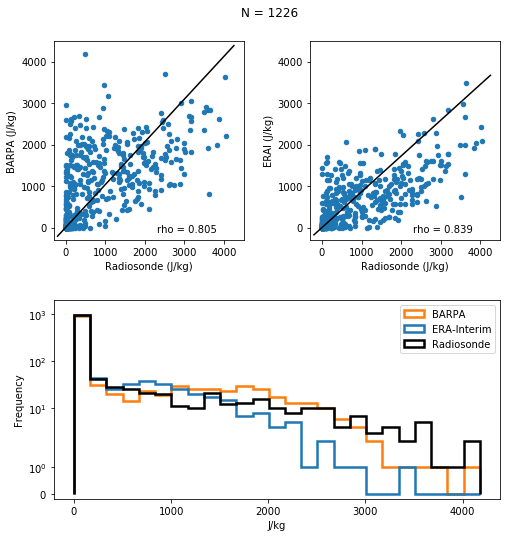

In [24]:
plt.figure(figsize=[8,8])
ax=plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=1)
cape.plot(kind="scatter",x="obs", y="barpa", ax=ax)
plt.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [ax.get_ylim()[0], ax.get_ylim()[1]], color="k")
plt.text(2300, -100, "rho = "+get_corr_str(cape["obs"].values, cape["barpa"].values))
plt.xlim([-300,4500])
plt.ylim([-300,4500])
ax.set_ylabel("BARPA (J/kg)"); ax.set_xlabel("Radiosonde (J/kg)")

ax=plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=1)
cape.plot(kind="scatter",x="obs", y="erai", ax=ax)
plt.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [ax.get_ylim()[0], ax.get_ylim()[1]], color="k")
plt.text(2300, -100, "rho = "+get_corr_str(cape["obs"].values, cape["erai"].values))
plt.xlim([-300,4500])
plt.ylim([-300,4500])
ax.set_ylabel("ERAI (J/kg)"); ax.set_xlabel("Radiosonde (J/kg)")

ax=plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=2)
plt.hist([cape["obs"].values, cape["erai"].values, cape["barpa"].values], label=["Radiosonde","ERA-Interim","BARPA"], bins=25, histtype="step", lw=2.5, color=["k","tab:blue","tab:orange"])
plt.yscale("symlog", linthresh=1)
plt.ylim([-0.2,2000])
plt.legend()
plt.xlabel("J/kg")
plt.ylabel("Frequency")

plt.suptitle("N = "+str(cape.shape[0]))
plt.subplots_adjust(wspace=0.35, hspace=0.3, top=0.92)
plt.savefig("/g/data/eg3/ab4502/figs/barpa/erai_stn_compare_cape.png", bbox_inches="tight")

In [7]:
aws = read_aws_half_hourly()
aws = aws[np.in1d(aws.stn_name,["Adelaide","Darwin","Sydney","Woomera"])]

In [8]:
#Combine gusts for obs, BARPA and ERAI, for times which are common between all three datasets
barpa_wg = barpa.set_index(["time","stn_name"])["wg10"].rename("barpa")
erai_wg = erai.set_index(["time","stn_name"])["wg10"].rename("erai")
aws_wg = aws.set_index(["time","stn_name"])["wind_gust"].rename("obs")
wg = pd.concat([barpa_wg, erai_wg, aws_wg], axis=1).dropna()

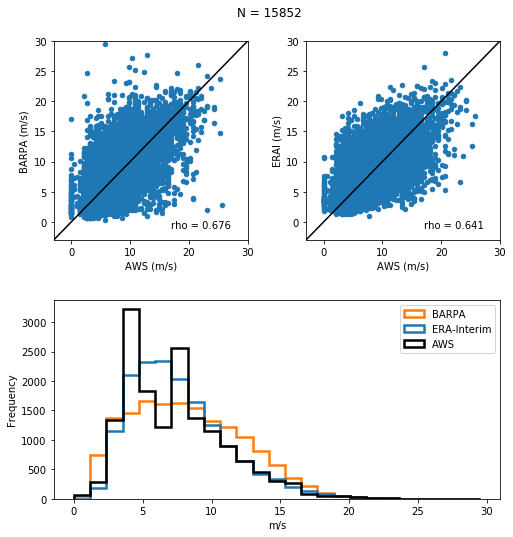

In [25]:
plt.figure(figsize=[8,8])
ax=plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=1)
wg.plot(kind="scatter",x="obs", y="barpa", ax=ax)
plt.xlim([-3,30])
plt.ylim([-3,30])
plt.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [ax.get_ylim()[0], ax.get_ylim()[1]], color="k")
plt.text(17, -1, "rho = "+get_corr_str(wg["obs"].values, wg["barpa"].values))
ax.set_ylabel("BARPA (m/s)"); ax.set_xlabel("AWS (m/s)")

ax=plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=1)
wg.plot(kind="scatter",x="obs", y="erai", ax=ax)
plt.xlim([-3,30])
plt.ylim([-3,30])
plt.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [ax.get_ylim()[0], ax.get_ylim()[1]], color="k")
plt.text(17, -1, "rho = "+get_corr_str(wg["obs"].values, wg["erai"].values))

ax.set_ylabel("ERAI (m/s)"); ax.set_xlabel("AWS (m/s)")

ax=plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=2)
plt.hist([wg["obs"].values, wg["erai"].values, wg["barpa"].values], label=["AWS","ERA-Interim","BARPA"], bins=25, histtype="step", lw=2.5, color=["k","tab:blue","tab:orange"])

plt.legend()
plt.xlabel("m/s")
plt.ylabel("Frequency")

plt.suptitle("N = "+str(wg.shape[0]))

plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.92)
plt.savefig("/g/data/eg3/ab4502/figs/barpa/erai_stn_compare_wg10.png", bbox_inches="tight")

In [26]:
wg

,,barpa,erai,obs
time,stn_name,,,
2005-01-01 00:00:00,Sydney,7.93750,7.492188,5.111111
2005-01-01 06:00:00,Sydney,12.06250,8.796875,8.194444
2005-01-01 12:00:00,Sydney,8.00000,6.578125,5.111111
2005-01-01 18:00:00,Sydney,9.87500,6.015625,11.305556
2005-01-02 00:00:00,Sydney,5.40625,7.953125,5.111111
...,...,...,...,...
2015-12-30 18:00:00,Sydney,11.37500,2.640625,3.111111
2015-12-31 00:00:00,Sydney,17.50000,6.164062,3.111111
2015-12-31 06:00:00,Sydney,15.03125,8.132812,11.305556
